Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ver
Info in <TCanvas::Print>: png file Pval.png has been created


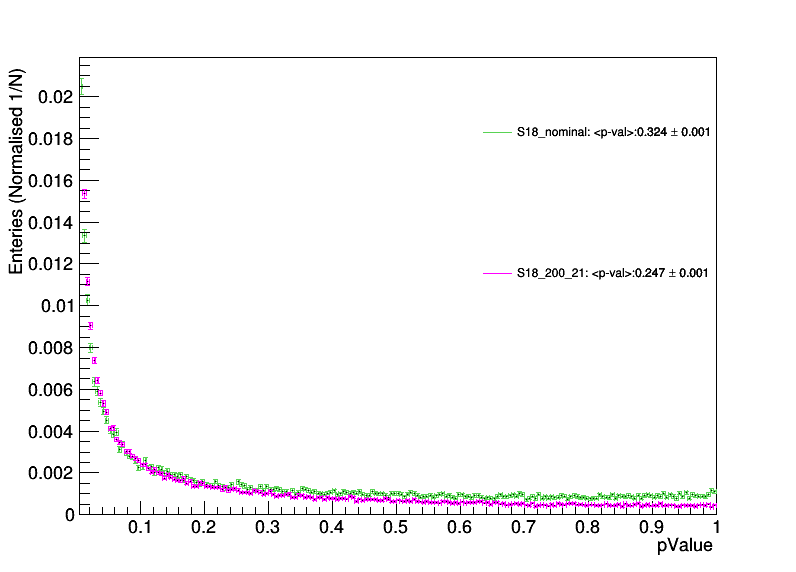

In [9]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend

#Define constant paths and labels 
path = "TrackSummary/FitResults/pValues"
scr_nominal = "/Users/gleb/software/alignTrack/mpIIDESY/PVal/S18/nominal/trackRecoPlots.root"
# scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/PVal/S18/200_22/trackRecoPlots.root"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/PVal/S18/200_21/trackRecoPlots.root"
stateN=2

#Containers to store histograms in orders as the names 
names = ["S18_nominal", "S18_200_21"]
colors = [8, 6] 

#Open TFiles
scrFile_nominal = TFile.Open(scr_nominal)
scrFile_shift = TFile.Open(scr_shift)
fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)

###### Vertical ##########
         
#Make new canvas for plots 
c_ver = TCanvas("c_ver", "Vertical Projection", 800, 600)
legend =  TLegend(0.8, 0.89, 0.6, 0.4)

i_total = 0 # total counter 
# TODO use 2D arrays next time 
for i_state in range(0, stateN):

    #Get the TH2F 
    pVal = fileName[i_state].Get(str(path)) 

    #Apply 30 us time cut 
    pVal.GetXaxis().SetRangeUser(0.005, 1.0) 

    pVal.SetTitle("")
    pVal.SetLineColor(colors[i_total])
    norm = pVal.GetEntries();
    pVal.Scale(1/norm); # normalise the histo 
    pVal.GetYaxis().SetTitle("Enteries (Normalised 1/N)")
    pVal.GetYaxis().SetTitleOffset(1.4);
    pVal.Draw("same E1")

    mean = round(pVal.GetMean(), 3)
    mean_error = round(pVal.GetMeanError(), 3)

    legenValue1 = str(names[i_total])+": <p-val>:"+str(mean)+" #pm "+str(mean_error) 
    legend.AddEntry(pVal, str(legenValue1), "L")
    legend.Draw("same")

    i_total+=1 


gStyle.SetOptStat(0) 
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.023)
c_ver.Draw()
c_ver.Print("Pval.png")